# MONDAY: Data manipulation, data preprocessing, and linear algebra

In [3]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

not forget:
* for some reason when pytorch isn't build with numpy support dtypes can't be mixed so use for ease of use float
  

## Data manipulation

In [9]:
# making a tensor
x = torch.arange(1, 11, 1, dtype=torch.float32)
print(x)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


In [11]:
# vector length
print(x.numel())

10


In [19]:
# vector shape only one element just like a vector ! 
print(x.shape)

torch.Size([10])


In [20]:
# reshaping the vector 
y = x.reshape(2,5)

In [21]:
print(y)

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.]])


In [22]:
# the width or the rows are always known when the other is known 
# so we can give the -1 sign to have torch decide what's the other one 
z = y.reshape(-1, 2)

In [23]:
print(z)

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])


In [24]:
# making a tensor with all 1s 

a = torch.ones(3, 3, 3)

In [25]:
print(a)

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


In [28]:
# or random numbers 
b = torch.randn(3,3)
print(b)

tensor([[ 0.5113,  1.6393, -0.3460],
        [-1.1671, -0.7248,  0.1154],
        [-1.3050,  1.7252, -0.5763]])


In [30]:
# building a tensor using python lists 
c = torch.tensor([[10, 10, 10], 
              [20,20,20], 
              [30, 30, 30] ])
print(c)

tensor([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])


In [44]:
# selecting elements 

print(x[-1], x[0], c[2,0], z[:, 1],sep="\n")

tensor(10.)
tensor(1.)
tensor(30)
tensor([ 2.,  4.,  6.,  8., 10.])


In [52]:
# performing math operations on a tensor 

print(torch.exp(x), x.exp(), sep="\n\n")

tensor([2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02, 4.0343e+02,
        1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04])

tensor([2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02, 4.0343e+02,
        1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04])


In [69]:
# vector multiplications
l = torch.tensor([1, 2, 4, 8])
m = torch.ones(4) * 2

print(m*l, l/m, l-m, l+m, l**m, sep = "\n\n")

tensor([ 2.,  4.,  8., 16.])

tensor([0.5000, 1.0000, 2.0000, 4.0000])

tensor([-1.,  0.,  2.,  6.])

tensor([ 3.,  4.,  6., 10.])

tensor([ 1.,  4., 16., 64.])


In [83]:
# concat and stack
print(torch.cat((l,m), dim = 0))
print()
print(torch.stack((l,m)))

tensor([1., 2., 4., 8., 2., 2., 2., 2.])

tensor([[1., 2., 4., 8.],
        [2., 2., 2., 2.]])


In [84]:
# performing logic operations 

l == m

tensor([False,  True, False, False])

In [85]:
m.sum()

tensor(8.)

In [91]:
# broadcastin: when matrices do not match with respect to their shape broadcasting happens. 
# --> expand the martices and perform the operation with the new matrices of equal width and length

o = torch.arange(3).reshape(3,1)
p = torch.arange(2).reshape(1,2)

o, p

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [95]:
# look what happens when we perform additions, both matrices were expanded to have length 3 and width 2 and were then added.

o + p

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [99]:
# reducing memory: when assigning a new value to a vector the old value is overwritten, as the variable points to another place in memory.

before = id(m)
m = l + m 
id(y) == before



False

In [103]:
# As we often don't want reallocate memory everytime we can stop this behaviour by using slice notation 

m = torch.ones(4) * 2 
print("id(m):", id(m))
m[:] = l + m
print("id(m):", id(m))

id(m): 139663706583792
id(m): 139663706583792


In [111]:
# the += notation also does not reallocate memory
before = id(l)
m+=l
id(l) == before

True

In [115]:
# conversion to numpy 

print(x.numpy())
type(x.numpy())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


numpy.ndarray

In [131]:
# broadcasting doesn't work because there is no community with respect to length and size between the two vectors 

e = torch.arange(1, 26, 1).reshape(5,-1)
f = torch.arange(1, 4, 2)

e*f

RuntimeError: The size of tensor a (5) must match the size of tensor b (2) at non-singleton dimension 1

## Data preprocessing 

In [132]:
# first convert to numpy float and then to tensor 
# the rest was about pandas 

## Linear algebra

* We can denote column vector like
$ \Large \mathbf{\vec{y}}=
\begin{pmatrix}
x_1\\x_2\\x_2
\end{pmatrix}
$
and a row vector like:
$\Large \mathbf{\vec{y}} =
\begin{pmatrix}
x_1, x_2, x_3
\end{pmatrix}
$


* to denote that a vector contain only reel numbers (i.e. no fractions): $x \in \mathbb{R}$
* vectors are denoted by a small bold letter
* to denote the number of dimension of a vector we add the $n$ like $x \in \mathbb{R}^n$
* matrices are denoted by capital letter in bold: $\mathbf{Y}=\begin{pmatrix}x_1, x_2, x_3\end{pmatrix}$ or $\large x \in \mathbb{R}^{m*n}$
* A transposed matrix is denoted as $\large \mathbf{Y}^\intercal$


element wise operations have the same dimensions as their input vector or matrix. 

In [137]:
# using vectors 
x, x + x, x *x

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 tensor([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 tensor([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.]))

multiplication of two matrices is called "Hadamard product" and denoted by $\circ$ like $\mathbf{Y} \circ \mathbf{Y}$

In [142]:
# using matrices 
c, c * c

(tensor([[10, 10, 10],
         [20, 20, 20],
         [30, 30, 30]]),
 tensor([[100, 100, 100],
         [400, 400, 400],
         [900, 900, 900]]))

In [172]:
c = torch.tensor(c, dtype = torch.float32)
# summing matrices 
print(c.sum())

# over the axis 
print(c.sum(axis=0))
print(c.sum(axis=1))

# taking the mean
print(c.mean(),
c.mean(axis=0),
c.mean(axis=1),
     sep="\n")

tensor(180.)
tensor([60., 60., 60.])
tensor([30., 60., 90.])
tensor(20.)
tensor([20., 20., 20.])
tensor([10., 20., 30.])


/tmp/ipykernel_22965/3526106115.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  c = torch.tensor(c, dtype = torch.float32)


In [168]:
c.mean(axis=1)

tensor([10., 20., 30.])

The dot product or inproduct of two vectors is denoted as $\langle a, b \rangle$ and represent the sum over the element wise multiplication. 

In [175]:
torch.dot(x, x)

tensor(385.)

The matrix vector product is used to perform the dot product calculation with a single value from the vector on all the items in the items in the i'th row of the matrix. 

In [207]:
d = torch.tensor([2,1,0], dtype=torch.float32)
E = torch.tensor([[1, -1, 2], [0, -3, 1]], dtype=torch.float32)

In [210]:
E@d, torch.mv(E,d)

(tensor([ 1., -3.]), tensor([ 1., -3.]))

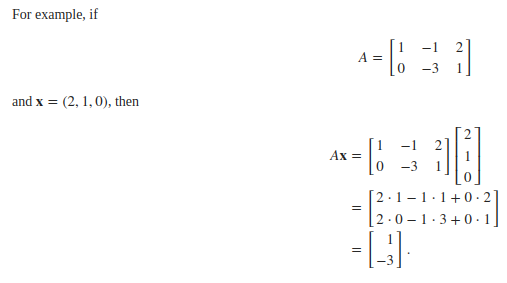

Matrix-matrix prodcut is only defined when the number of rows is the same as the number of columns or vice versa among the matrices
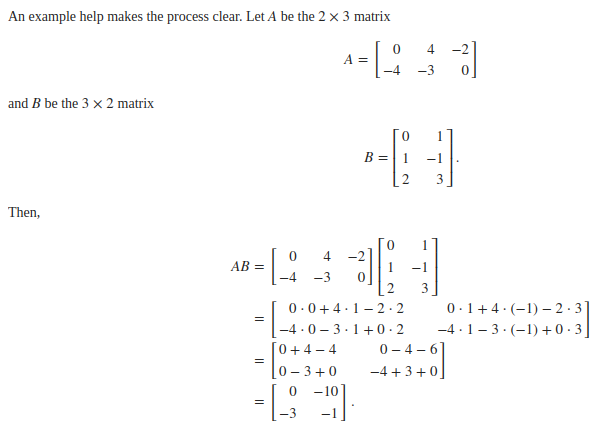

In [211]:
A = torch.tensor([[0, 4, -2], [-4, -3, 0]], dtype=torch.float32)
B = torch.tensor([[0,1], [1, -1], [2,3]], dtype=torch.float32)

In [213]:
A@B, torch.mm(A, B)

(tensor([[  0., -10.],
         [ -3.,  -1.]]),
 tensor([[  0., -10.],
         [ -3.,  -1.]]))

The **norm** of a vector tells us how big it is e.g. the $l_2$ norm measure the euclidean length of a vector. 

Properties of the norm are: 
* if we scale the the vector $\mathbf{x}$ by a scalar $\alpha \in \mathbb{R}$, the norm changes accordingly.
* for any vectors $\mathbf{x,y}$: norms satisfy the triangle inequality i.e. the sum of any two sides is bigger than the thirs side. 
* The norm of a vector is nonnegative and it only vanishes if the vector is zero


In [221]:
xy = torch.tensor([3,4], dtype=torch.float32)

In [222]:
torch.norm(xy)

tensor(5.)

In [241]:
xyz= torch.arange(24).reshape(2,3,4)

In [245]:
xyz.sum(axis=2)

tensor([[ 6, 22, 38],
        [54, 70, 86]])

In [243]:
xyz

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])